In [ ]:
%cd ..
import os
print(os.getcwd())

############# NOTEBOOK PARAMETERS ##############

parameters = dict()
parameters['file'] = None # set to None for file prompt
parameters['dynamic_range'] = 40
parameters['interpolation'] = 'bilinear'
parameters['cmap'] = 'viridis'

################################################

from notebook_functions import *
from mpl_toolkits import mplot3d as mp3d
from matplotlib import patches
import abstract


## FUNCTIONS ##

## SCRIPT ##

if parameters['file'] is None:
    parameters['file'] = open_file_dialog()

file = parameters['file']
arrays = abstract.load(file)
if not isinstance(arrays, (list, tuple)):
    arrays = list(arrays)

### <center>Notebook parameters</center>

In [ ]:
display(HTML('<center>' + tabulate.tabulate(parameters.items(), tablefmt='html') + '</center>'))

### <center>Drawing</center>

In [ ]:
def plot(arrays):

    def rotate_nodes(nodes, vec, angle):
        rmatrix = rotation_matrix(vec, angle)
        return rmatrix.dot(nodes.T).T

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    
    for array in arrays:
        
#         tx_channels = [ch for ch in array['channels'] if ch['kind'].lower() in ['transmit', 'tx']]
#         rx_channels = [ch for ch in array['channels'] if ch['kind'].lower() in ['receive', 'rx']]
#         dual_channels = [ch for ch in array['channels'] if ch['kind'].lower() in ['both', 'txrx']]
#         tx_centers = np.array([ch['center'] for ch in channels if ch['kind'] == 'transmit'])
#         rx_centers = np.array([ch['center'] for ch in channels if ch['kind'] == 'receive'])

        for ch in array['channels']:

            kind = ch['kind'].lower()

            for elem in ch['elements']:
                for mem in elem['membranes']:

                    length_x = mem['length_x']
                    length_y = mem['length_y']
                    center = mem['position']
                    rotations = mem.get('rotations', None)

                    vertices = np.array([[-length_x / 2, -length_y / 2, 0],
                                        [-length_x / 2, length_y / 2, 0],
                                        [length_x / 2, length_y / 2, 0],
                                        [length_x / 2, -length_y / 2, 0]])

                    if rotations is not None:
                        for vec, angle in rotations:
                            vertices = rotate_nodes(vertices, vec, angle)

                    vertices = vertices + center

                    rect = mp3d.art3d.Poly3DCollection([vertices])
                    rect.set_edgecolor('black')
                    
                    if kind in ['transmit', 'tx']:
                        rect.set_facecolor(red)
                    elif kind in ['receive', 'rx']:
                        rect.set_facecolor(blue)
                    elif kind in ['both', 'txrx']:
                        rect.set_facecolor(purple)
                    
                    ax.add_collection3d(rect)

#     for p in panes:

#         vtx = p['vertices']
#         rect = mp3d.art3d.Poly3DCollection([vtx])
#         rect.set_facecolor([1, 1, 1, 0.2])
#         rect.set_edgecolor('k')
#         ax.add_collection3d(rect)
    
    plt.tight_layout()
    
    # set limits
    centers = np.concatenate(abstract.get_membrane_positions_from_array(arrays), axis=0)
    
    xmax, ymax, _ = np.max(np.abs(centers), axis=0)

    xmax = xmax - 5e-4
    ymax = ymax - 5e-4
    zmax = max(xmax, ymax) / 2
    maxdim = max(xmax, ymax)

    ax.set_xlim(-maxdim, maxdim)
    ax.set_ylim(-maxdim, maxdim)
    ax.set_zlim(0, 2 * maxdim)

    ax.azim, ax.elev = 90, 90
#     ax.set_axis_off()
    ax.set_aspect('equal')

#     ax.set_xlabel('\n x (m)')
#     ax.set_ylabel('\n y (m)')
#     ax.set_zlabel('\n z (m)')
#     ax.set_title('3D array geometry')

    
#     proxy1 = patches.Rectangle((0,0), 1, 1, facecolor=red)
#     proxy2         = patches.Rectangle((0, 0), 1, 1, facecolor=blue)

#     leg = ax.legend([proxy1, proxy2], ['Transmit', 'Receive'], loc='best')
#     leg.get_frame().set_linewidth(0.7)
#     leg.draggable(state=True)

#     fig.show()
    return fig


# figs = list()
# for a in angles:
#     figs.append(plot(a))

fig = plot(arrays)
# display(export_widget(figs))

Button(description='Export figures', style=ButtonStyle())

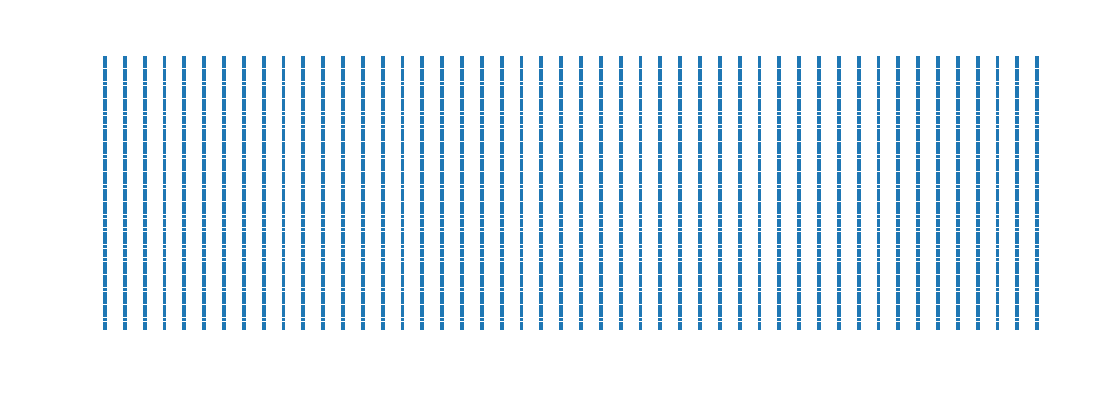

In [50]:
def plot(arrays):

    def rotate_nodes(nodes, vec, angle):
        rmatrix = rotation_matrix(vec, angle)
        return rmatrix.dot(nodes.T).T
    
    from matplotlib.collections import PatchCollection
    
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    
    collection = list()
    
    for array in arrays:
        for ch in array['channels']:

            kind = ch['kind'].lower()

            for elem in ch['elements']:
                for mem in elem['membranes']:

                    length_x = mem['length_x']
                    length_y = mem['length_y']
                    center = mem['position']
                    rotations = mem.get('rotations', None)

                    vertices = np.array([[-length_x / 2, -length_y / 2, 0],
                                         [-length_x / 2, length_y / 2, 0],
                                         [length_x / 2, length_y / 2, 0],
                                         [length_x / 2, -length_y / 2, 0]])

                    if rotations is not None:
                        for vec, angle in rotations:
                            vertices = rotate_nodes(vertices, vec, angle)

                    vertices = vertices + center

                    poly = patches.Polygon(vertices[:, :2], lw=0.1)
#                     poly.set_edgecolor('black')
                    
                    if kind in ['transmit', 'tx']:
                        poly.set_facecolor(red)
                    elif kind in ['receive', 'rx']:
                        poly.set_facecolor(blue)
                    elif kind in ['both', 'txrx']:
                        poly.set_facecolor(purple)
                    
                    collection.append(poly)
                    
    ax.add_collection(PatchCollection(collection))

#     for p in panes:

#         vtx = p['vertices']
#         rect = mp3d.art3d.Poly3DCollection([vtx])
#         rect.set_facecolor([1, 1, 1, 0.2])
#         rect.set_edgecolor('k')
#         ax.add_collection3d(rect)
    
    plt.tight_layout()
    
    # set limits
    centers = np.concatenate(abstract.get_membrane_positions_from_array(arrays), axis=0)
    
    xmax, ymax, _ = np.max(np.abs(centers), axis=0)

    xmax = xmax + 5e-4
    ymax = ymax + 5e-4
    maxdim = max(xmax, ymax)

    ax.set_xlim(-xmax, xmax)
    ax.set_ylim(-ymax, ymax)
    ax.set_axis_off()
    ax.set_aspect('equal')

#     ax.set_xlabel('\n x (m)')
#     ax.set_ylabel('\n y (m)')
#     ax.set_zlabel('\n z (m)')
#     ax.set_title('3D array geometry')

    
#     proxy1 = patches.Rectangle((0,0), 1, 1, facecolor=red)
#     proxy2         = patches.Rectangle((0, 0), 1, 1, facecolor=blue)

#     leg = ax.legend([proxy1, proxy2], ['Transmit', 'Receive'], loc='best')
#     leg.get_frame().set_linewidth(0.7)
#     leg.draggable(state=True)

#     fig.show()
    return fig


# figs = list()
# for a in angles:
#     figs.append(plot(a))

fig = plot(arrays)
display(export_widget(fig))

In [52]:
fig.savefig('test.pdf')